In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 4

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                792       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 1,086
Trainable params: 1,086
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
32/32 [==============================] - 0s 5ms/step - loss: 1.3966 - accuracy: 0.4109 - val_loss: 1.3798 - val_accuracy: 0.3852

Epoch 00001: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 2/1000
32/32 [==============================] - 0s 1ms/step - loss: 1.3799 - accuracy: 0.4386 - val_loss: 1.3656 - val_accuracy: 0.4079

Epoch 00002: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 3/1000
32/32 [==============================] - 0s 1ms/step - loss: 1.3632 - accuracy: 0.4494 - val_loss: 1.3497 - val_accuracy: 0.4615

Epoch 00003: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 4/1000
32/32 [==============================] - 0s 1ms/step - loss: 1.3478 - accuracy: 0.4829 - val_loss: 1.3297 - val_accuracy: 0.5219

Epoch 00004: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 5/1000
32/32 [==============================] - 0s 1ms/step - 

32/32 [==============================] - 0s 1ms/step - loss: 0.5665 - accuracy: 0.7883 - val_loss: 0.3475 - val_accuracy: 0.9562

Epoch 00036: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 37/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.7923 - val_loss: 0.3356 - val_accuracy: 0.9554

Epoch 00037: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 38/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5782 - accuracy: 0.7835 - val_loss: 0.3317 - val_accuracy: 0.9569

Epoch 00038: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 39/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.7966 - val_loss: 0.3277 - val_accuracy: 0.9585

Epoch 00039: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 40/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5

32/32 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.8182 - val_loss: 0.2399 - val_accuracy: 0.9653

Epoch 00071: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 72/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.8273 - val_loss: 0.2405 - val_accuracy: 0.9668

Epoch 00072: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 73/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.8210 - val_loss: 0.2395 - val_accuracy: 0.9668

Epoch 00073: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 74/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.8318 - val_loss: 0.2358 - val_accuracy: 0.9660

Epoch 00074: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 75/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4

32/32 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.8323 - val_loss: 0.2117 - val_accuracy: 0.9683

Epoch 00106: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 107/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.8434 - val_loss: 0.2101 - val_accuracy: 0.9675

Epoch 00107: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 108/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8449 - val_loss: 0.2099 - val_accuracy: 0.9683

Epoch 00108: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 109/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.8416 - val_loss: 0.2102 - val_accuracy: 0.9668

Epoch 00109: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 110/1000
32/32 [==============================] - 0s 1ms/step - loss:

Epoch 141/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8439 - val_loss: 0.1991 - val_accuracy: 0.9683

Epoch 00141: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 142/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8557 - val_loss: 0.1958 - val_accuracy: 0.9690

Epoch 00142: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 143/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8484 - val_loss: 0.1940 - val_accuracy: 0.9683

Epoch 00143: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 144/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8474 - val_loss: 0.1940 - val_accuracy: 0.9683

Epoch 00144: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 145/1000
32/32 [==============================] - 0s 1

32/32 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8512 - val_loss: 0.1885 - val_accuracy: 0.9705

Epoch 00176: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 177/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8464 - val_loss: 0.1874 - val_accuracy: 0.9690

Epoch 00177: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 178/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8507 - val_loss: 0.1854 - val_accuracy: 0.9690

Epoch 00178: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 179/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8492 - val_loss: 0.1858 - val_accuracy: 0.9698

Epoch 00179: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 180/1000
32/32 [==============================] - 0s 1ms/step - loss:

32/32 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8560 - val_loss: 0.1802 - val_accuracy: 0.9683

Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 212/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8545 - val_loss: 0.1791 - val_accuracy: 0.9683

Epoch 00212: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 213/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8545 - val_loss: 0.1801 - val_accuracy: 0.9653

Epoch 00213: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 214/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8618 - val_loss: 0.1781 - val_accuracy: 0.9675

Epoch 00214: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 215/1000
32/32 [==============================] - 0s 1ms/step - loss:

32/32 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8517 - val_loss: 0.1774 - val_accuracy: 0.9705

Epoch 00246: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 247/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8557 - val_loss: 0.1788 - val_accuracy: 0.9721

Epoch 00247: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 248/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8512 - val_loss: 0.1770 - val_accuracy: 0.9721

Epoch 00248: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 249/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3714 - accuracy: 0.8698 - val_loss: 0.1736 - val_accuracy: 0.9713

Epoch 00249: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 250/1000
32/32 [==============================] - 0s 1ms/step - loss:

Epoch 281/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8573 - val_loss: 0.1721 - val_accuracy: 0.9721

Epoch 00281: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 282/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8570 - val_loss: 0.1712 - val_accuracy: 0.9705

Epoch 00282: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 283/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8588 - val_loss: 0.1744 - val_accuracy: 0.9721

Epoch 00283: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 284/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8530 - val_loss: 0.1721 - val_accuracy: 0.9721

Epoch 00284: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 285/1000
32/32 [==============================] - 0s 1

32/32 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8575 - val_loss: 0.1711 - val_accuracy: 0.9721

Epoch 00316: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 317/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8628 - val_loss: 0.1691 - val_accuracy: 0.9705

Epoch 00317: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 318/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8593 - val_loss: 0.1700 - val_accuracy: 0.9698

Epoch 00318: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 319/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8560 - val_loss: 0.1685 - val_accuracy: 0.9690

Epoch 00319: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 00319: early stopping


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.9282897  0.02111579 0.01498731 0.03560711]
0


# 混同行列

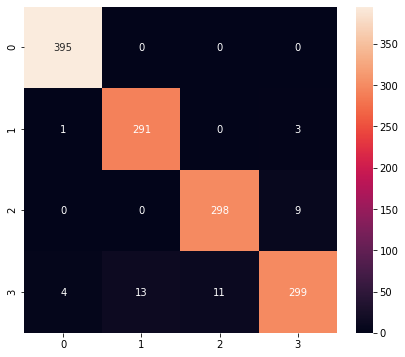

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.96      0.99      0.97       295
           2       0.96      0.97      0.97       307
           3       0.96      0.91      0.94       327

    accuracy                           0.97      1324
   macro avg       0.97      0.97      0.97      1324
weighted avg       0.97      0.97      0.97      1324



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\offic\AppData\Local\Temp\tmpm61u3pw8\assets


6240

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_1', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.9282897  0.02111579 0.01498731 0.03560711]
0
